# Profitable Apps to build for the App Store & Google Play Markets

## The goal of this project is to determine which apps are the most profitable through in-app ads for a company that builds free to download Android & iOS mobile apps. This will help the company decide what kind of apps to build. 
## This can be accomplished by isolating & analyzing free to download Android & iOS apps to determine what type of apps have the highest amount of traffic. More user traffic means more ad views.

## Because there are millions of existing apps & collecting data for a dataset that large would cost considerable time & resources, I will be using a smaller dataset that was free to use.

### I think using pandas dataframes will be perfect for our analysis & i'm planning on using some graphs for visual representation.
### let's begin by importing the libraries we will need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Next we can import our Android & iOS datasets & immediately convert them into pandas dataframes.

In [2]:
android_file = pd.read_csv("C:/Users/gavin/Jupyter/Datasets/googleplaystore.csv")
android = pd.DataFrame(android_file)

ios_file = pd.read_csv("C:/Users/gavin/Jupyter/Datasets/AppleStore.csv")
ios = pd.DataFrame(ios_file)

### Now that we've got our datasets, let's print a visual sample & see what we're working with. Let's start with our Android dataset.

In [3]:
# Printing a visual of the first 5 rows including the headers to see what we're working with. 
android.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


###  Now that we see the structure of our Android dataset, lets find out how big the dataset is. We dont want to print the entire dataset because it will take up a lot of space without giving us valuable information.
  
###  Instead we can just print the size of our dataset.

In [4]:
# Print number of rows by columns
android.shape

(10841, 13)

### Before any work can be done with the dataset, it has to be cleaned. To begin cleaning, lets remove any rows with missing values since that information will not be useful for getting an accurate analysis.
### First let's check if there are any rows with missing / null values.

In [5]:
# Get a count of missing / null values
na_count = android.isna().sum() 
total_na = na_count.sum() 
print("Count of missing values:")
print(na_count)
print(f"Total NULL count: {total_na}")

Count of missing values:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
Total NULL count: 1487


### It looks like we have 1487 rows with missing values, let's go ahead and remove those rows from our dataset.

In [6]:
android = android_file.dropna()

### We can verify all rows will missing / null information has been removed.

In [7]:
# Get a count of missing / null values
android.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### There are no rows with missing values.
### Let's get size of our workable dataset now.

In [8]:
# Print number of rows by columns
android.shape

(9360, 13)

### Our next step in cleaning the data is to remove any duplicate entries. 
### First we need to check if there are any duplicates in the dataset.

In [9]:
# Get count of duplicates in the 'App' column. The 'App' column contains the names of apps.
duplicate_app = android.duplicated(subset=['App'], keep=False)
print(len(duplicate_app[duplicate_app]))

1959


### We have 1959 Apps with the same name.
### Let's remove any duplicates and keep only the first entry for each.

In [10]:
android = android.drop_duplicates(subset=['App'])

### We can verify there are no more duplicate app names.

In [11]:
# Get count of duplicates in the 'App' column. The 'App' column contains the names of apps.
duplicate_app = android.duplicated(subset=['App'], keep=False)
print(len(duplicate_app[duplicate_app]))

0


### We have now cleaned our dataset of missing information & duplicates.
### Let's see the size of our dataset

In [12]:
android.shape

(8190, 13)

### Now let's get our iOS dataset ready for analysis. 
### We start with a visual sample to see the data structure of our dataset.

In [13]:
# Print first 5 rows of ios dataset.
ios = pd.DataFrame(ios_file)
ios.head(10)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
5,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1
6,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
7,553834731,Candy Crush Saga,222846976,USD,0.0,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1
8,324684580,Spotify Music,132510720,USD,0.0,878563,8253,4.5,4.5,8.4.3,12+,Music,37,5,18,1
9,343200656,Angry Birds,175966208,USD,0.0,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1


### Let's get the size our our dataset in it's current state.

In [14]:
# Print number of rows by columns
ios.shape

(7197, 16)

## We can begin our cleaning process.
## Le'ts check for any rows with missing / null values.

In [15]:
# Get count of missing / null values
na_count = ios.isna().sum() 
total_na = na_count.sum() 
print("Count of missing values:")
print(na_count)
print(f"Total NULL count: {total_na}")

Count of missing values:
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64
Total NULL count: 0


### There are no rows with missing or null values.
### We can move on to checking for duplicate entries.

In [16]:
# Get count of duplicates in the 'track_name' column. The 'track_name' column contains the names of apps.
duplicate_app = ios.duplicated(subset=['track_name'], keep=False)
print(len(duplicate_app[duplicate_app]))

4


## There are only 4 duplicate entries, lets remove them.

In [17]:
ios = ios.drop_duplicates(subset=['track_name'])

### Now we can verify the removal of duplicates & check the size of our workable dataset.

In [18]:
# Removing duplicates
duplicate_app = ios.duplicated(subset=['track_name'], keep=False)
print(len(duplicate_app[duplicate_app]))

0


In [19]:
# Count rows by columns
ios.shape

(7195, 16)

### Now that we have both of our workable datasets, let's start filtering out any non-english apps since we only want to work with apps we can read & understand.

### We can start by creating a function that can distinguish English from non-English apps.

### To do this, we can create a for loop that checks each character to determine if it's ascii point is greater than 127 (non-English character's) returning a False if it is, & returning True if it is within ascii point 0-127(English character's).

In [20]:
def is_english(string):
    # Initialize a counter to track non-ASCII characters
    count = 0
    for character in string:
        # Check if the character's Unicode value is greater than 127 (non-ASCII range)
        if ord(character) > 127: 
            count += 1
    # Print the number of non-ASCII characters found
    print(f"Non-ASCII characters: {count}")
    # Return True if no non-ASCII characters were found, False otherwise
    return count == 0

# Testing the is_english function.
print(is_english('English_Apps'))
print(is_english('中文应用程序'))
print(is_english('CarMax â€“ Cars for Sale: Search Used Car Inventory'))
print(is_english('Truyá»‡n Vui TÃ½ Quáº­y'))

Non-ASCII characters: 0
True
Non-ASCII characters: 6
False
Non-ASCII characters: 3
False
Non-ASCII characters: 8
False


### Testing the function revealed that some English apps may be classified as non-English such as ('CarMax â€“ Cars for Sale: Search Used Car Inventory') in our third print test because it has 2 non-ascii characters in the name( â€), however some non-ascii characters are counted more than once. 


### We need to improve the accuracy!

### Let's make an ascii limiter that counts non-ascii characters in a name. If a name has more than 3 non-ascii characters, it will be considered not English.

In [21]:
def count_non_ascii(app_name):
    count = 0
    for char in app_name:
        if ord(char) > 127:
            count += 1
    return count

def is_english(app_name):
    if count_non_ascii(app_name) > 3:
        return False
    else:
        return True
    
# Testing is_english function
print("is English" if is_english('Coloring Book Moana') else "is not English")
print("is English" if is_english('中文应用程序') else "is not English")
print("is English" if is_english('CarMax â€“ Cars for Sale: Search Used Car Inventory') else "is not English")
print("is English" if is_english('Truyá»‡n Vui TÃ½ Quáº­y') else "is not English")

is English
is not English
is English
is not English


### We have achieved an English app filter, now its time to implement the function to our Android & iOS datasets.

### We start by creating empty lists for both datasets & use the is_English function to add rows of english only apps to their respective lists. Then we convert those lists into pandas dataframes to continue working with them.

In [22]:
# Create empty lists
android_english = []
ios_english = []

# If the App name is english, add that row to android_english list.
for index, row in android.iterrows():
    name = row['App']
    if is_english(name):
        android_english.append(row)
# if the track_name is english, add that row to ios_english list.        
for index, row in ios.iterrows():
    name = row['track_name']
    if is_english(name):
        ios_english.append(row)

#convert the lists into pandas dataframes.
android_english_df = pd.DataFrame(android_english)
ios_english_df = pd.DataFrame(ios_english)

### Out of curiosity, i'd like to see the dataframes with non_English apps only, just to check the accuracy of the English filter. So we'll create dataframes for non_English apps as well.

In [23]:
# Create empty lists
android_non_english = []
ios_non_english = []

# If the App name is NOT english, add that row to android_non_english list.
for index, row in android.iterrows():
    name = row['App']
    if not is_english(name):
        android_non_english.append(row)

# If the track_name is NOT english, add that row to ios_non_english list.
for index, row in ios.iterrows():
    name = row['track_name']
    if not is_english(name):
        ios_non_english.append(row)

# Convert the lists into pandas dataframes.
android_non_english_df = pd.DataFrame(android_non_english)
ios_non_english_df = pd.DataFrame(ios_non_english)

### Let's do a comparison of dataset sizes before & after we seperated English & non-English apps.

In [24]:
# size of the android dataset before extracting English & non-English into seperate dataframes.
android.shape

(8190, 13)

In [25]:
# size of the non-english android dataset
android_non_english_df.shape

(116, 13)

In [26]:
# size of the english android dataset
android_english_df.shape

(8074, 13)

### For the android comparison we can see that 116 non-English apps were extracted leaving us with 8074 English apps to work with.

In [27]:
# size of the iOS dataset before extracting English & non-English into seperate dataframes.
ios.shape

(7195, 16)

In [28]:
# size of the non-english iOS dataset
ios_non_english_df.shape

(1097, 16)

In [29]:
# size of the english iOS dataset
ios_english_df.shape

(6098, 16)

### For the iOS comparison we can see that 1097 non-English apps were extracted leaving us with 6098 English apps. A considerably larger pool of non-English apps than the android dataset had.

### Now i'd like to visually verify a slice of each dataset, to ensure accuracy of the English app filter.

In [30]:
# Android English Apps
android_english_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [31]:
# Android non-English Apps
android_non_english_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
89,Zona Azul Digital FÃ¡cil SP CET - OFFICIAL SÃ£...,AUTO_AND_VEHICLES,4.6,7880,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,10-May-18,4.6.5,Varies with device
139,Wattpad ðŸ“– Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,1-Aug-18,Varies with device,Varies with device
309,Truyá»‡n Vui TÃ½ Quáº­y,COMICS,4.5,144,4.7M,"10,000+",Free,0,Everyone,Comics,19-Jul-18,3,4.0.3 and up
310,Comic Es - Shojo manga / love comics free of c...,COMICS,3.9,2181,10M,"100,000+",Free,0,Teen,Comics,5-Mar-18,1.2.12,4.0.3 and up
313,"æ¼«å’– Comics - Manga,Novel and Stories",COMICS,4.1,12088,21M,"1,000,000+",Free,0,Mature 17+,Comics,6-Jul-18,2.3.1,4.0.3 and up
418,"Dolphin Browser - Fast, Private & AdblockðŸ¬",COMMUNICATION,4.5,2511130,Varies with device,"50,000,000+",Free,0,Everyone,Communication,2-Jul-18,Varies with device,Varies with device
541,FlirtChat - â™¥Free Dating/Flirting Appâ™¥,DATING,4.3,2430,13M,"500,000+",Free,0,Mature 17+,Dating,26-Jul-18,12.0.4,4.1 and up
710,Flame - Ø¯Ø±Ø¨ Ø¹Ù‚Ù„Ùƒ ÙŠÙˆÙ…ÙŠØ§,EDUCATION,4.6,56065,37M,"1,000,000+",Free,0,Everyone,Education,26-Jul-18,3.3,4.1 and up
882,ðŸ”¥ Football Wallpapers 4K | Full HD Backgrou...,ENTERTAINMENT,4.7,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,14-Jul-18,1.1.3.2,4.0.3 and up
1081,Ä°ÅŸCep,FINANCE,4.5,381788,32M,"10,000,000+",Free,0,Everyone,Finance,2-Aug-18,3.22.0,4.1 and up


In [32]:
# iOS English Apps
ios_english_df.head(10)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
5,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1
6,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
7,553834731,Candy Crush Saga,222846976,USD,0.0,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1
8,324684580,Spotify Music,132510720,USD,0.0,878563,8253,4.5,4.5,8.4.3,12+,Music,37,5,18,1
9,343200656,Angry Birds,175966208,USD,0.0,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1


In [33]:
# iOS non-English Apps
ios_non_english_df.head(10)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
458,336860594,Victoriaâ€™s Secret â€“ The Sexiest Bras & Lin...,60976128,USD,0.00,34507,38,3.5,5.0,5.2.1,12+,Shopping,37,0,1,1
649,797639732,RollerCoaster TycoonÂ® 4 Mobileâ„¢,195613696,USD,0.00,21407,1146,3.5,4.0,1.10.14,4+,Games,37,5,14,1
670,489185828,happn â€” Dating app â€” Find and meet your crush,78902272,USD,0.00,20546,78,4.5,4.5,7.8.2,17+,Lifestyle,37,0,14,1
693,900721327,EA SPORTSâ„¢ UFCÂ®,985080832,USD,0.00,19354,408,4.5,4.5,1.9.3,12+,Games,38,5,10,1
694,727420266,LEGOÂ® Star Warsâ„¢: The Complete Saga,865561600,USD,0.00,19340,289,4.0,4.0,1.9.15,9+,Games,40,5,1,1
813,445375097,çˆ±å¥‡è‰ºPPS -ã€Šæ¬¢ä¹é¢‚2ã€‹ç”µè§†å‰§çƒ­æ’­,224617472,USD,0.00,14844,0,4.0,0.0,6.3.3,17+,Entertainment,38,5,3,1
1087,611436052,Star WarsÂ®: Knights of the Old Republicâ„¢,2469642240,USD,9.99,8767,965,4.0,4.5,1.2.5,12+,Games,40,5,5,1
1193,405667771,"èšåŠ›è§†é¢‘HD-äººæ°‘çš„åä¹‰,è·¨ç•Œæ­ŒçŽ‹å…¨...",90725376,USD,0.00,7446,8,4.0,4.5,5.0.8,12+,Entertainment,24,4,1,1
1427,336141475,ä¼˜é…·è§†é¢‘,204959744,USD,0.00,4885,0,3.5,0.0,6.7.0,12+,Entertainment,38,0,2,1
1518,425349261,ç½‘æ˜“æ–°é—» - ç²¾é€‰å¥½å†…å®¹ï¼Œç®—å‡ºä½ çš„å...,133134336,USD,0.00,4263,6,4.5,1.0,23.2,17+,News,37,4,2,1


### It looks like the English filter may not have 100% accuracy but it seems to be working very well for not having used a complex language detection library. 

### Now that we have our English only datasets, it's time to extract our free apps since we only want to examine profitable free to download apps.

### Lets begin by getting counts for free apps in our android & iOS datasets.

In [34]:
# Initialize counters for free apps in Android and iOS
android_free_count = 0
ios_free_count = 0

# Count free apps in Android dataset
for index, row in android_english_df.iterrows():
    if row['Price'] == '0':
        android_free_count += 1

# Count free apps in iOS dataset
for index, row in ios_english_df.iterrows():
    if row['price'] == 0.0:
        ios_free_count += 1

# Print the results
print("Android free apps:", android_free_count)
print("iOS free apps:", ios_free_count)

Android free apps: 7482
iOS free apps: 3167


### Let's see the counts for paid apps from the datasets.

In [35]:
# Initialize counters for paid apps in Android and iOS
android_paid_count = 0
ios_paid_count = 0

# Count paid apps in Android dataset
for index, row in android_english_df.iterrows():
    if row['Price'] != '0':
        android_paid_count += 1

# Count paid apps in iOS dataset
for index, row in ios_english_df.iterrows():
    if row['price'] != 0.0:
        ios_paid_count += 1

# Print the results
print("Android paid apps:",android_paid_count)
print("iOS paid apps:",ios_paid_count)

Android paid apps: 592
iOS paid apps: 2931


### Now it's time to extract the free apps from both datasets into lists & convert those lists into workable pandas dataframes.

In [36]:
# Initialize lists to store free apps in Android and iOS
android_free_apps = []
ios_free_apps = []

# Collect free apps in Android dataset
for index, row in android_english_df.iterrows():
    if row['Price'] == '0':
        android_free_apps.append(row)

# Collect free apps in iOS dataset
for index, row in ios_english_df.iterrows():
    if row['price'] == 0.0:
        ios_free_apps.append(row)

# Convert lists to DataFrames
android_free_df = pd.DataFrame(android_free_apps)
ios_free_df = pd.DataFrame(ios_free_apps)

### We now have cleaned datasets of free & English apps. Now its time to start analyzing them.

### Let's start off by getting the percentage of existing apps by category for the Android dataset.

In [37]:
# percentage of existing apps by category for the Android dataset
# Function to generate a frequency table
def freq_table(android_free_df, index):
    table = {}
    total = 0
    for value in android_free_df.iloc[:, index]:
        total += 1
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    table_percentages = {key: (table[key] / total) * 100 for key in table}
    return table_percentages

# Function to display the frequency table as an HTML table.(For aesthetics making the results easier to read)
def display_table(android_free_df, index):
    table = freq_table(android_free_df, index)
    result = "<table><tr><th>Rank</th><th>Android Category</th><th>Percentage of Total Apps</th></tr>"
    for i, (key, value) in enumerate(sorted(table.items(), key=lambda x: x[1], reverse=True), start=1):
        result += f"<tr><td>{i}</td><td>{key}</td><td>{value:.10f}%</td></tr>"
    result += "</table>"
    return result

# Display the HTML table
from IPython.display import display, HTML
display(HTML(display_table(android_free_df, 1)))

Rank,Android Category,Percentage of Total Apps
1,FAMILY,19.0991713446%
2,GAME,10.9730018712%
3,TOOLS,8.6607858861%
4,FINANCE,3.8358727613%
5,PRODUCTIVITY,3.7690457097%
6,LIFESTYLE,3.7022186581%
7,BUSINESS,3.3814488105%
8,PHOTOGRAPHY,3.3146217589%
9,SPORTS,3.1542368351%
10,COMMUNICATION,3.1141406041%


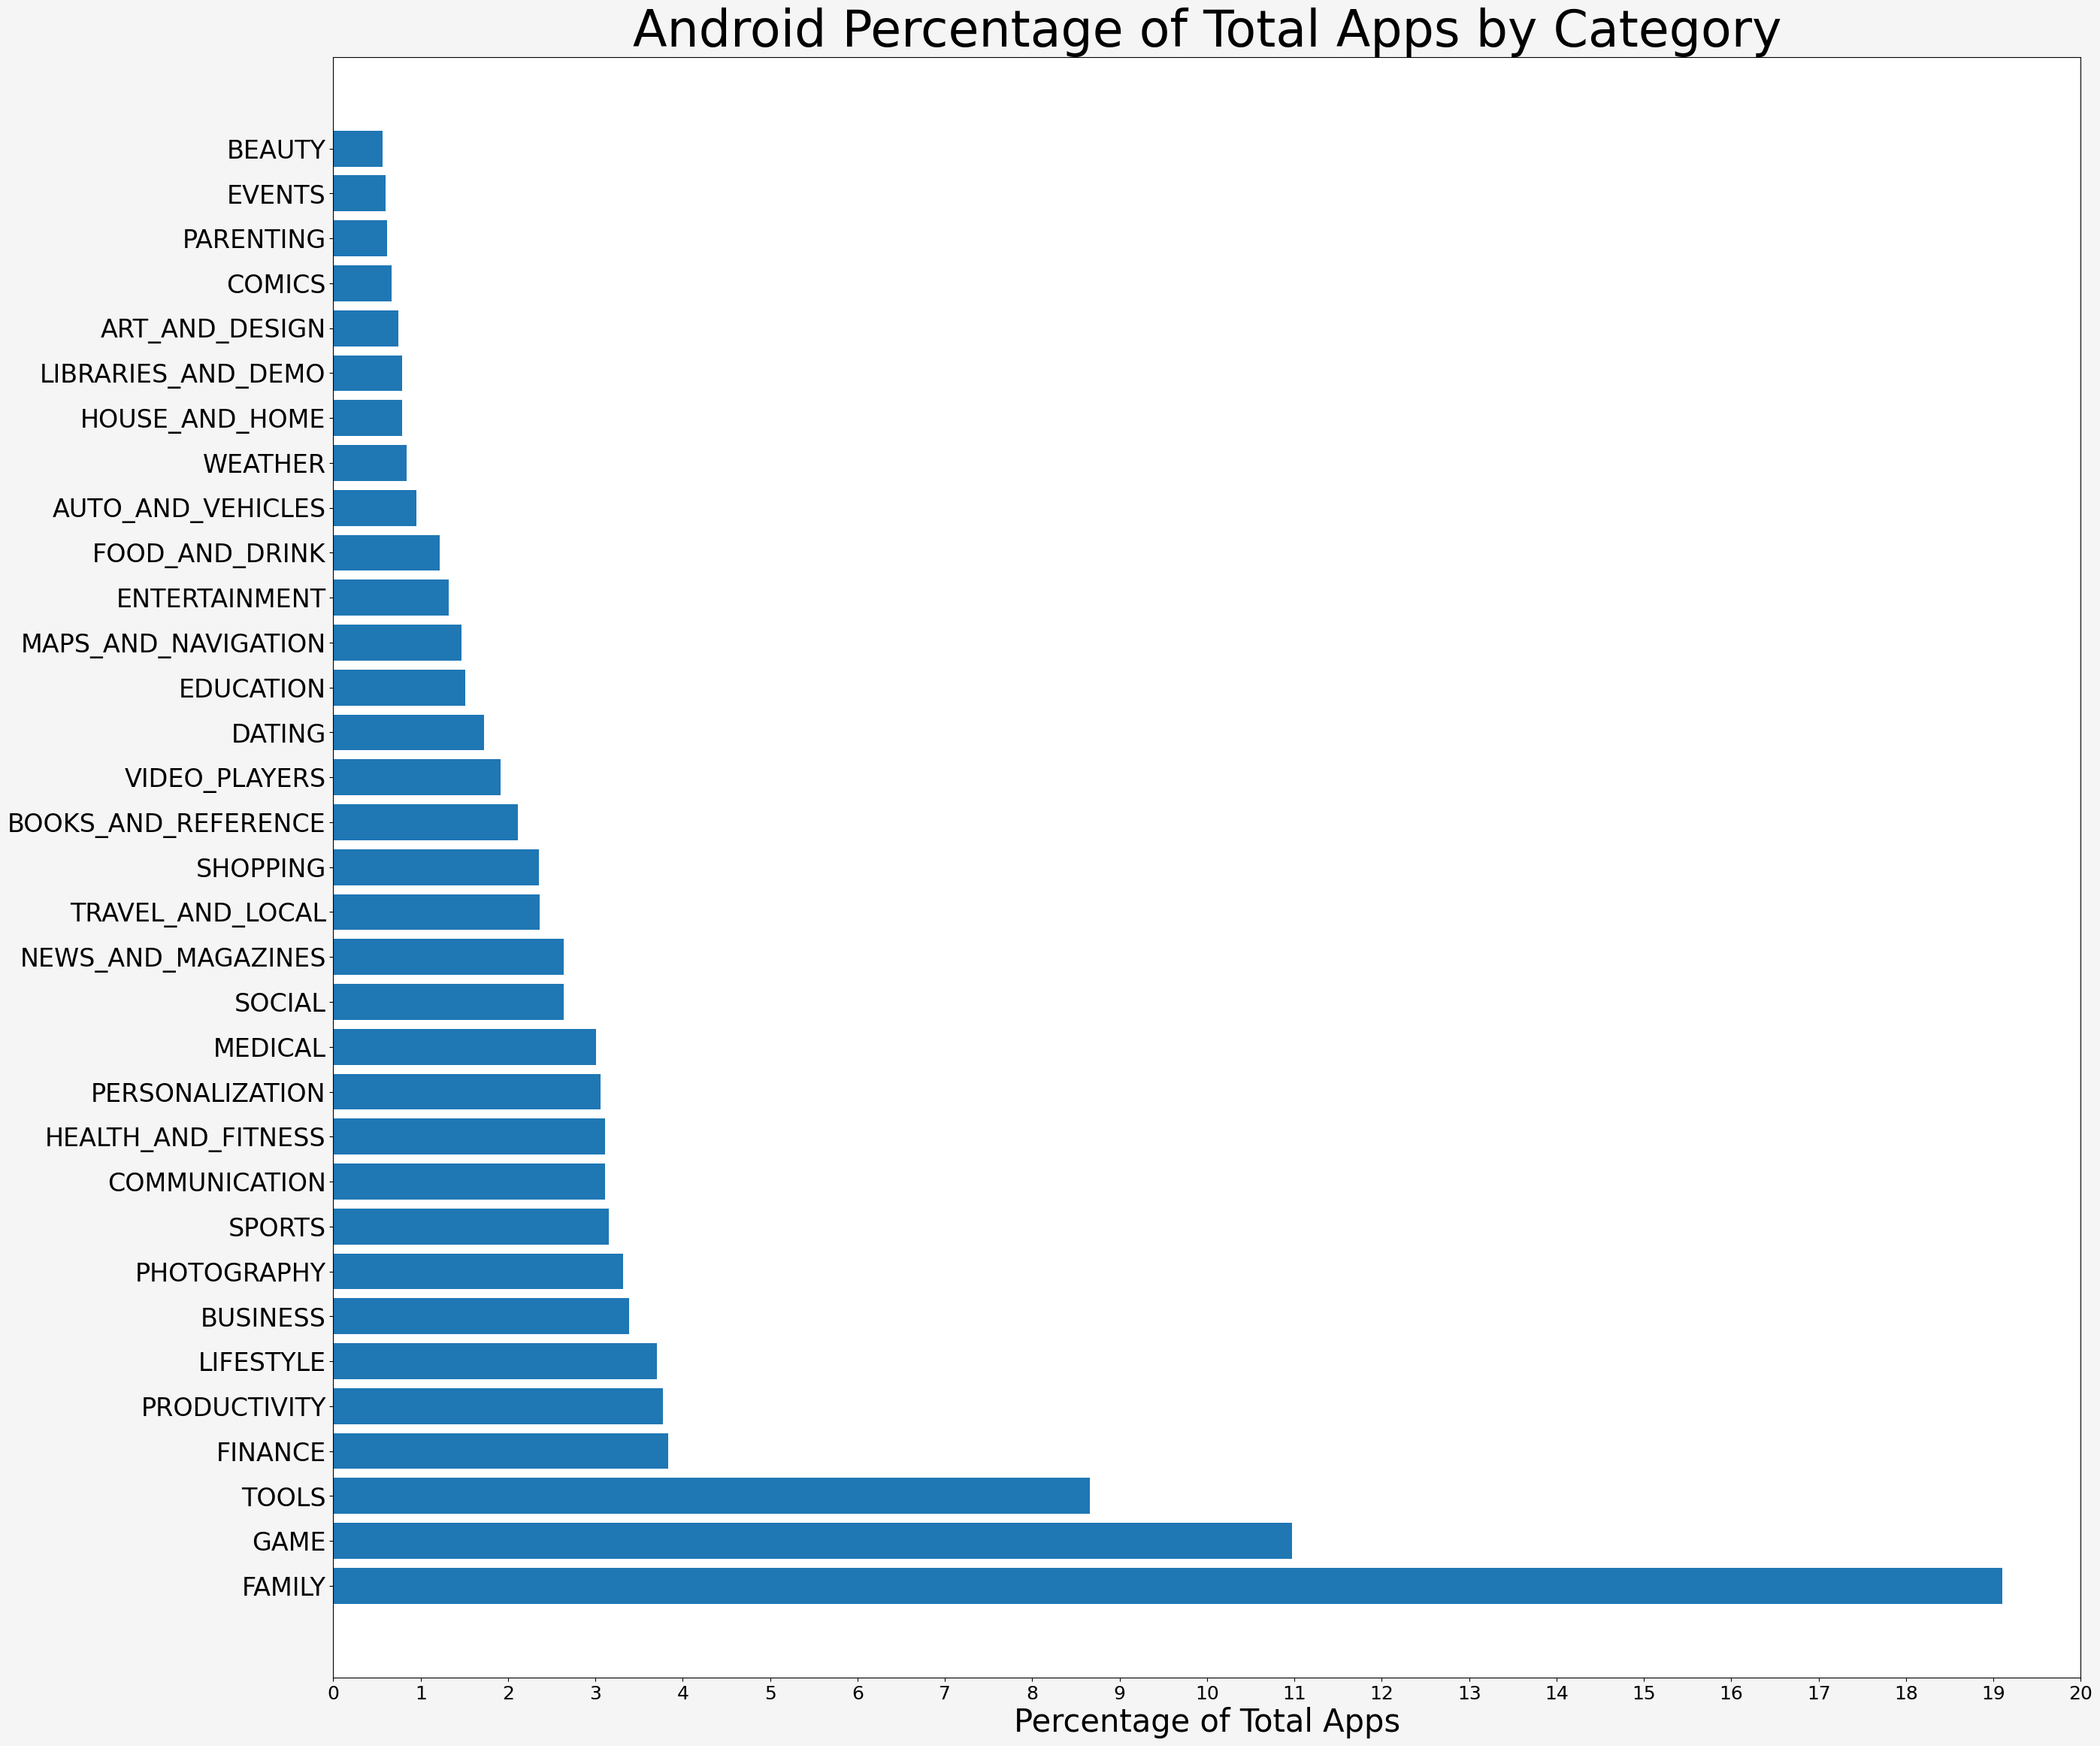

In [38]:
# Create a horizontal bar chart
plt.figure(figsize=(30, 28), facecolor='#f5f5f5')
table = freq_table(android_free_df, 1)  # get the frequency table for the 1st column
sorted_categories = sorted(table, key=table.get, reverse=True)
plt.barh(range(len(table)), [table[category] for category in sorted_categories])
plt.yticks(range(len(table)), sorted_categories, fontsize=24)
plt.xlabel('Percentage of Total Apps', fontsize=30)
plt.title('Android Percentage of Total Apps by Category', fontsize=48)
plt.xticks(range(0, 30, 1), fontsize=18)  # increase font size of x-axis tick labels and set x-ticks
plt.xlim(0, 20)  # set x-axis limits
plt.show()

### It looks like the top three categories with the most existing apps in the Android dataset in order is: Family, Games, Tools.

### Let's look at the percentage of total apps by genre in the iOS dataset.

In [39]:
# percentage of total apps by genre in the iOS dataset
# Function to generate a frequency table for iOS free apps
def freq_table(ios_free_df, index):
    table = {}
    total = 0
    for value in ios_free_df.iloc[:, index]:
        total += 1
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    table_percentages = {key: (table[key] / total) * 100 for key in table}
    return table_percentages

# Function to display the frequency table as an HTML table
def display_table(ios_free_df, index):
    table = freq_table(ios_free_df, index)
    result = "<table><tr><th>Rank</th><th>iOS Genre</th><th>Percentage of Total Apps</th></tr>"
    for i, (genre, percentage) in enumerate(sorted(table.items(), key=lambda x: x[1], reverse=True), start=1):
        result += f"<tr><td>{i}</td><td>{genre}</td><td>{float(percentage):.10f}%</td></tr>"
    result += "</table>"
    return result

# Display the HTML table for the 11th column of the iOS free apps dataset
from IPython.display import display, HTML
display(HTML(display_table(ios_free_df, 11)))

Rank,iOS Genre,Percentage of Total Apps
1,Games,58.5096305652%
2,Entertainment,7.8307546574%
3,Photo & Video,5.0520997790%
4,Education,3.7259235870%
5,Social Networking,3.2838648563%
6,Shopping,2.5260498895%
7,Utilities,2.3997473950%
8,Sports,2.1787180297%
9,Music,2.0524155352%
10,Health & Fitness,1.9892642880%


### Below is a visual representation the information above.

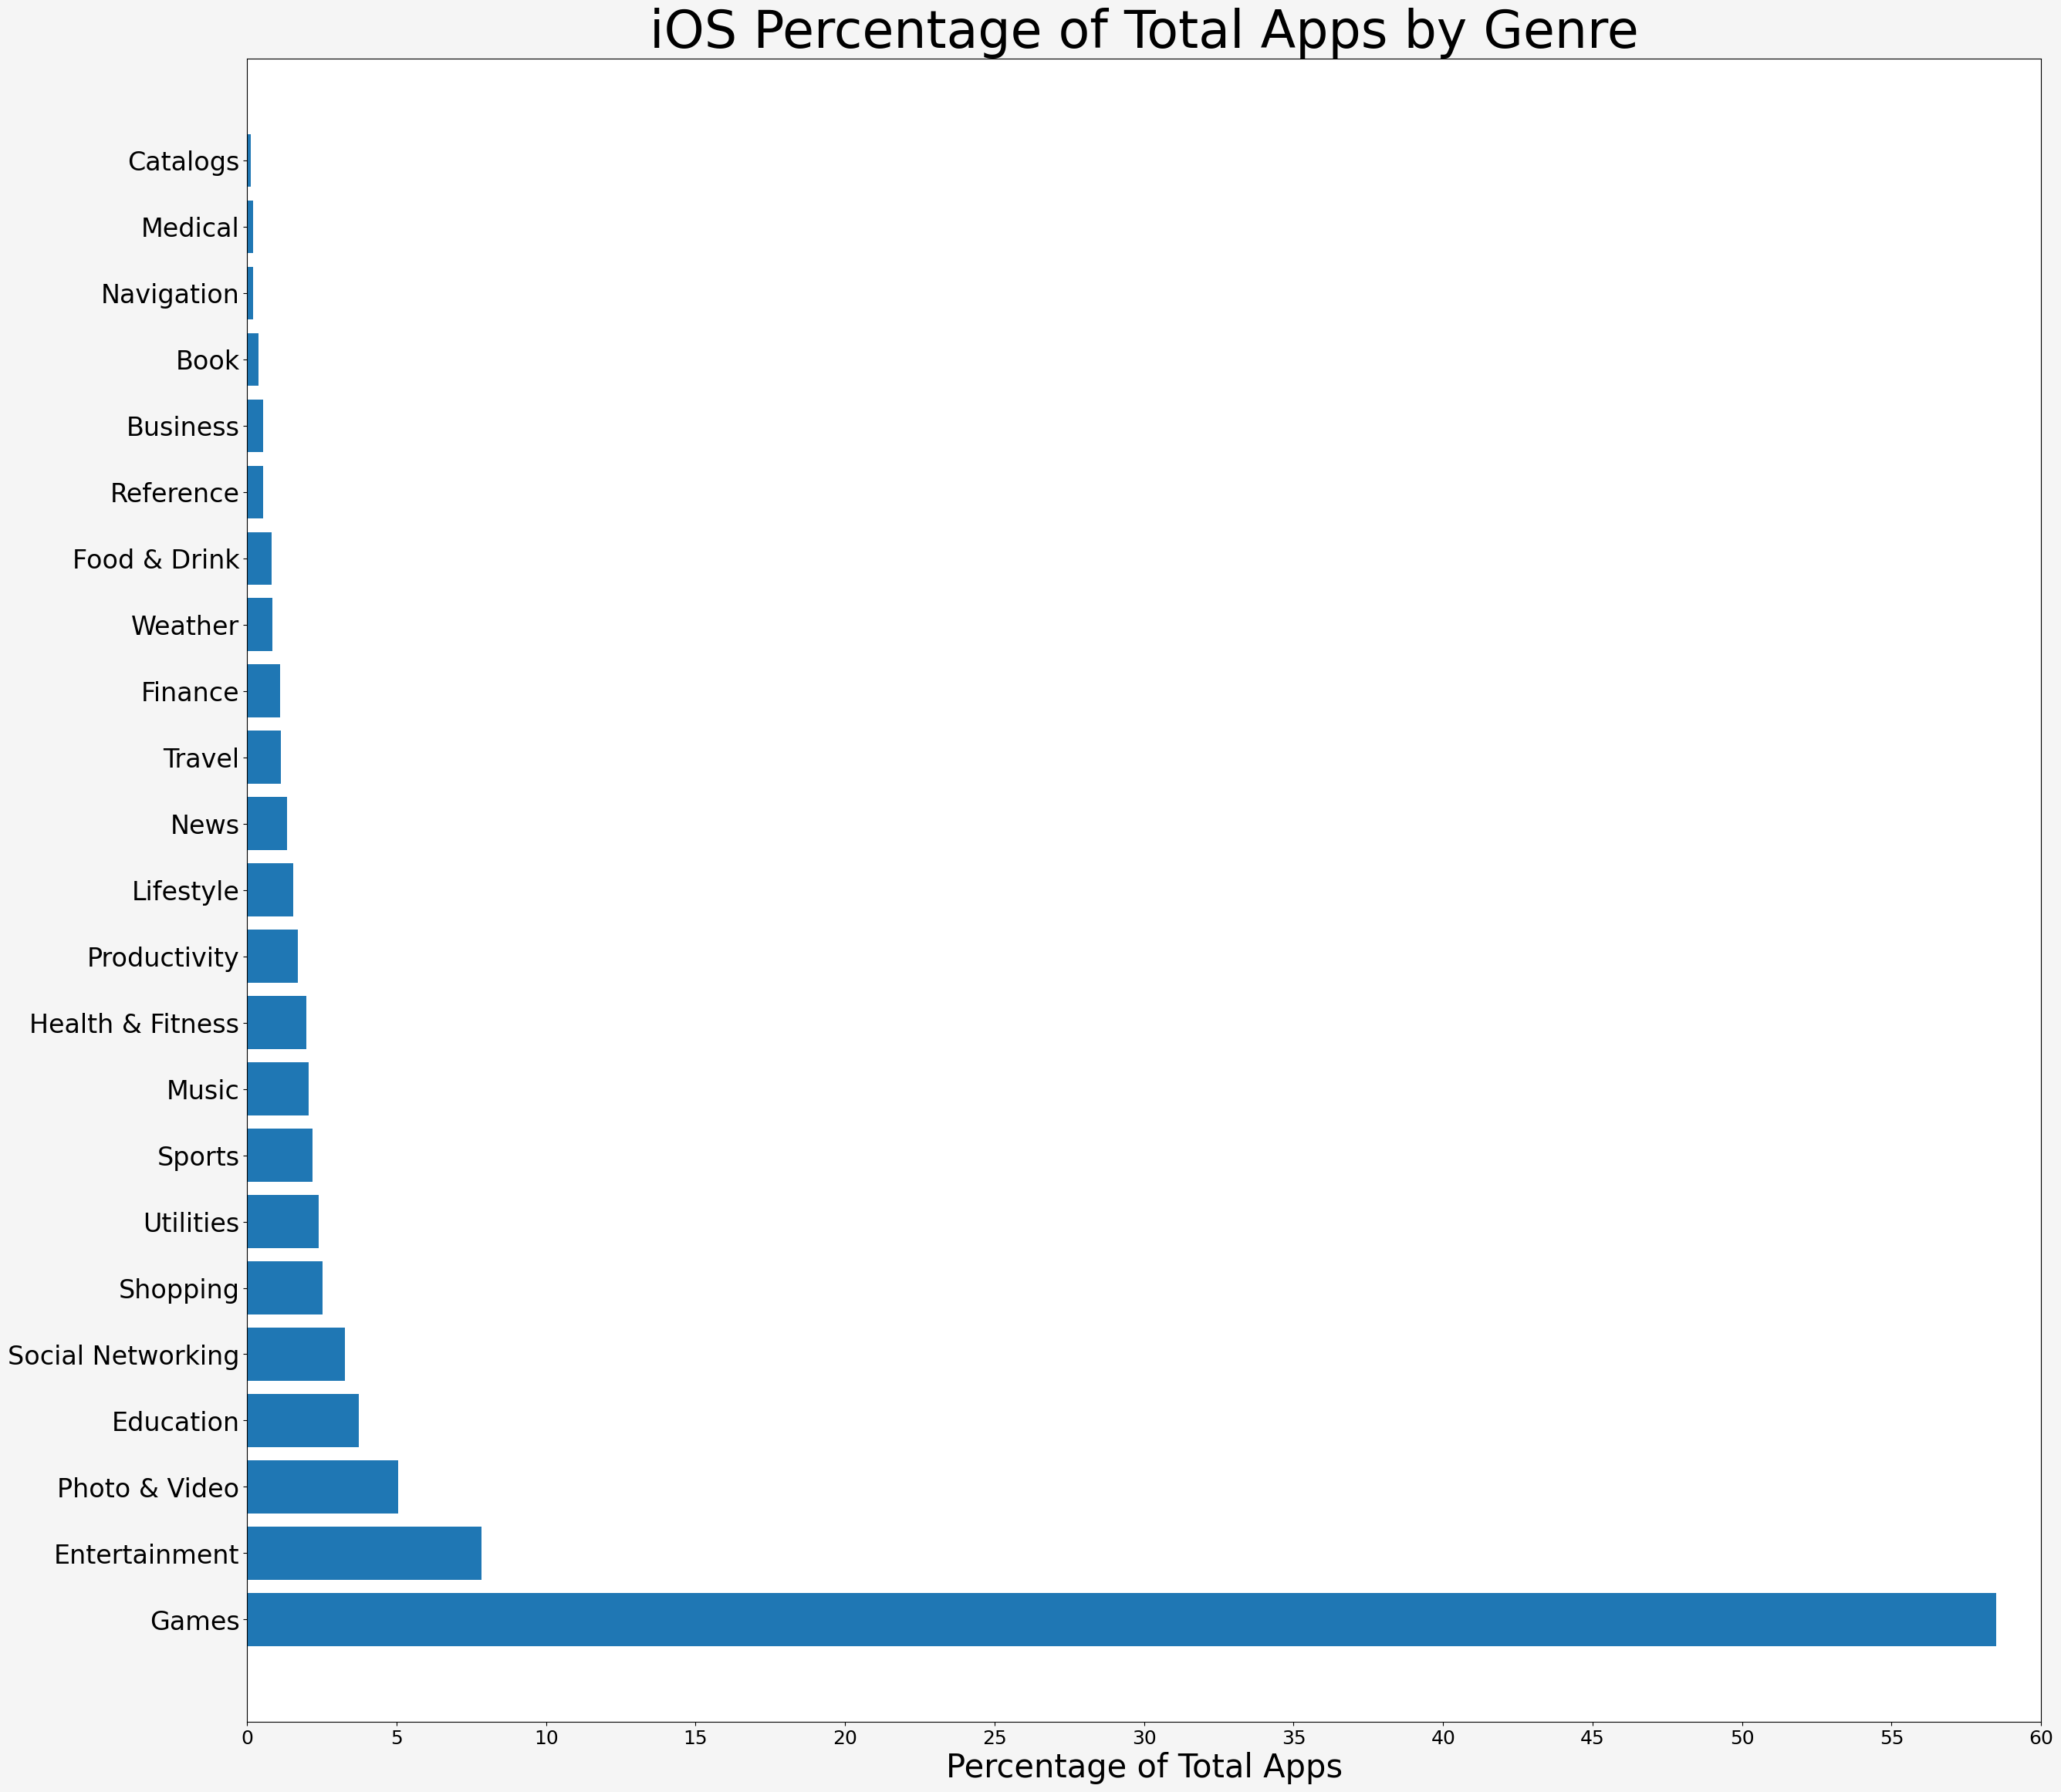

In [40]:
# Create a horizontal bar chart
plt.figure(figsize=(30, 28), facecolor='#f5f5f5')
table = freq_table(ios_free_df, 11)  # get the frequency table for the 11th column
sorted_categories = sorted(table, key=table.get, reverse=True)
plt.barh(range(len(table)), [table[category] for category in sorted_categories])
plt.yticks(range(len(table)), sorted_categories, fontsize=24)
plt.xlabel('Percentage of Total Apps', fontsize=30)
plt.title('iOS Percentage of Total Apps by Genre', fontsize=48)
plt.xticks(range(0, 70, 5), fontsize=18)  # increase font size of x-axis tick labels and set x-ticks
plt.xlim(0, 60)  # set x-axis limits
plt.show()

### Looking at the iOS dataset, the top three categories with the most apps in order is Games, Entertainment, Photo & Video, with Games taking up the majority of existing apps with 58.5% & Photo & video with only 5%.

### We can conclude that both datasets are highly saturated with Games. This does not mean that building Game apps are profitable, it may even be harder to build a profitable Game app because of the high amount of Game apps that already exist, but there's only one way to find out!

### Let's investigate by examining the percentage of installs per category to see which categories actually get the most traffic.

In [41]:
# Android's distribution of installs by category
# Preprocess the 'Installs' column, replacing non numeric values with empty spaces & converting the Installs column to numeric values.
android_free_df['Installs'] = android_free_df['Installs'].astype(str).str.replace(',', '', regex=False).str.replace('+', '', regex=False)
android_free_df['Installs'] = pd.to_numeric(android_free_df['Installs'])

# Define a function to generate a frequency table and calculate percentages for Installs
def freq_table(android_free_df, index):
    table = {}
    total_installs = android_free_df['Installs'].sum()
    for category, installs in android_free_df.groupby(android_free_df.iloc[:, index]):
        category_installs = installs['Installs'].sum()
        percentage = (category_installs / total_installs) * 100
        table[category] = percentage
    return table

# Define a function to display the frequency table as an HTML table(For aesthetics making the results easier to read)
def display_table(android_free_df, index):
    table = freq_table(android_free_df, index)
    result = "<table><tr><th>Rank</th><th>Android Category</th><th>Percentage of Total Installs</th></tr>"
    for i, (category, percentage) in enumerate(sorted(table.items(), key=lambda x: x[1], reverse=True), start=1):
        result += f"<tr><td>{i}</td><td>{category}</td><td>{percentage:.10f}%</td></tr>"
    result += "</table>"
    return result

# Display the HTML table for the 1st column of the Android free apps dataset(Category)
from IPython.display import display, HTML
display(HTML(display_table(android_free_df, 1)))

Rank,Android Category,Percentage of Total Installs
1,GAME,18.2355484103%
2,COMMUNICATION,14.7378165890%
3,TOOLS,10.7270820581%
4,PRODUCTIVITY,7.7688720332%
5,SOCIAL,7.3533328956%
6,PHOTOGRAPHY,6.2338465447%
7,FAMILY,5.8638017615%
8,VIDEO_PLAYERS,5.2659740215%
9,TRAVEL_AND_LOCAL,3.8829089855%
10,NEWS_AND_MAGAZINES,3.1764235996%


### Below is a visual representation the information above.

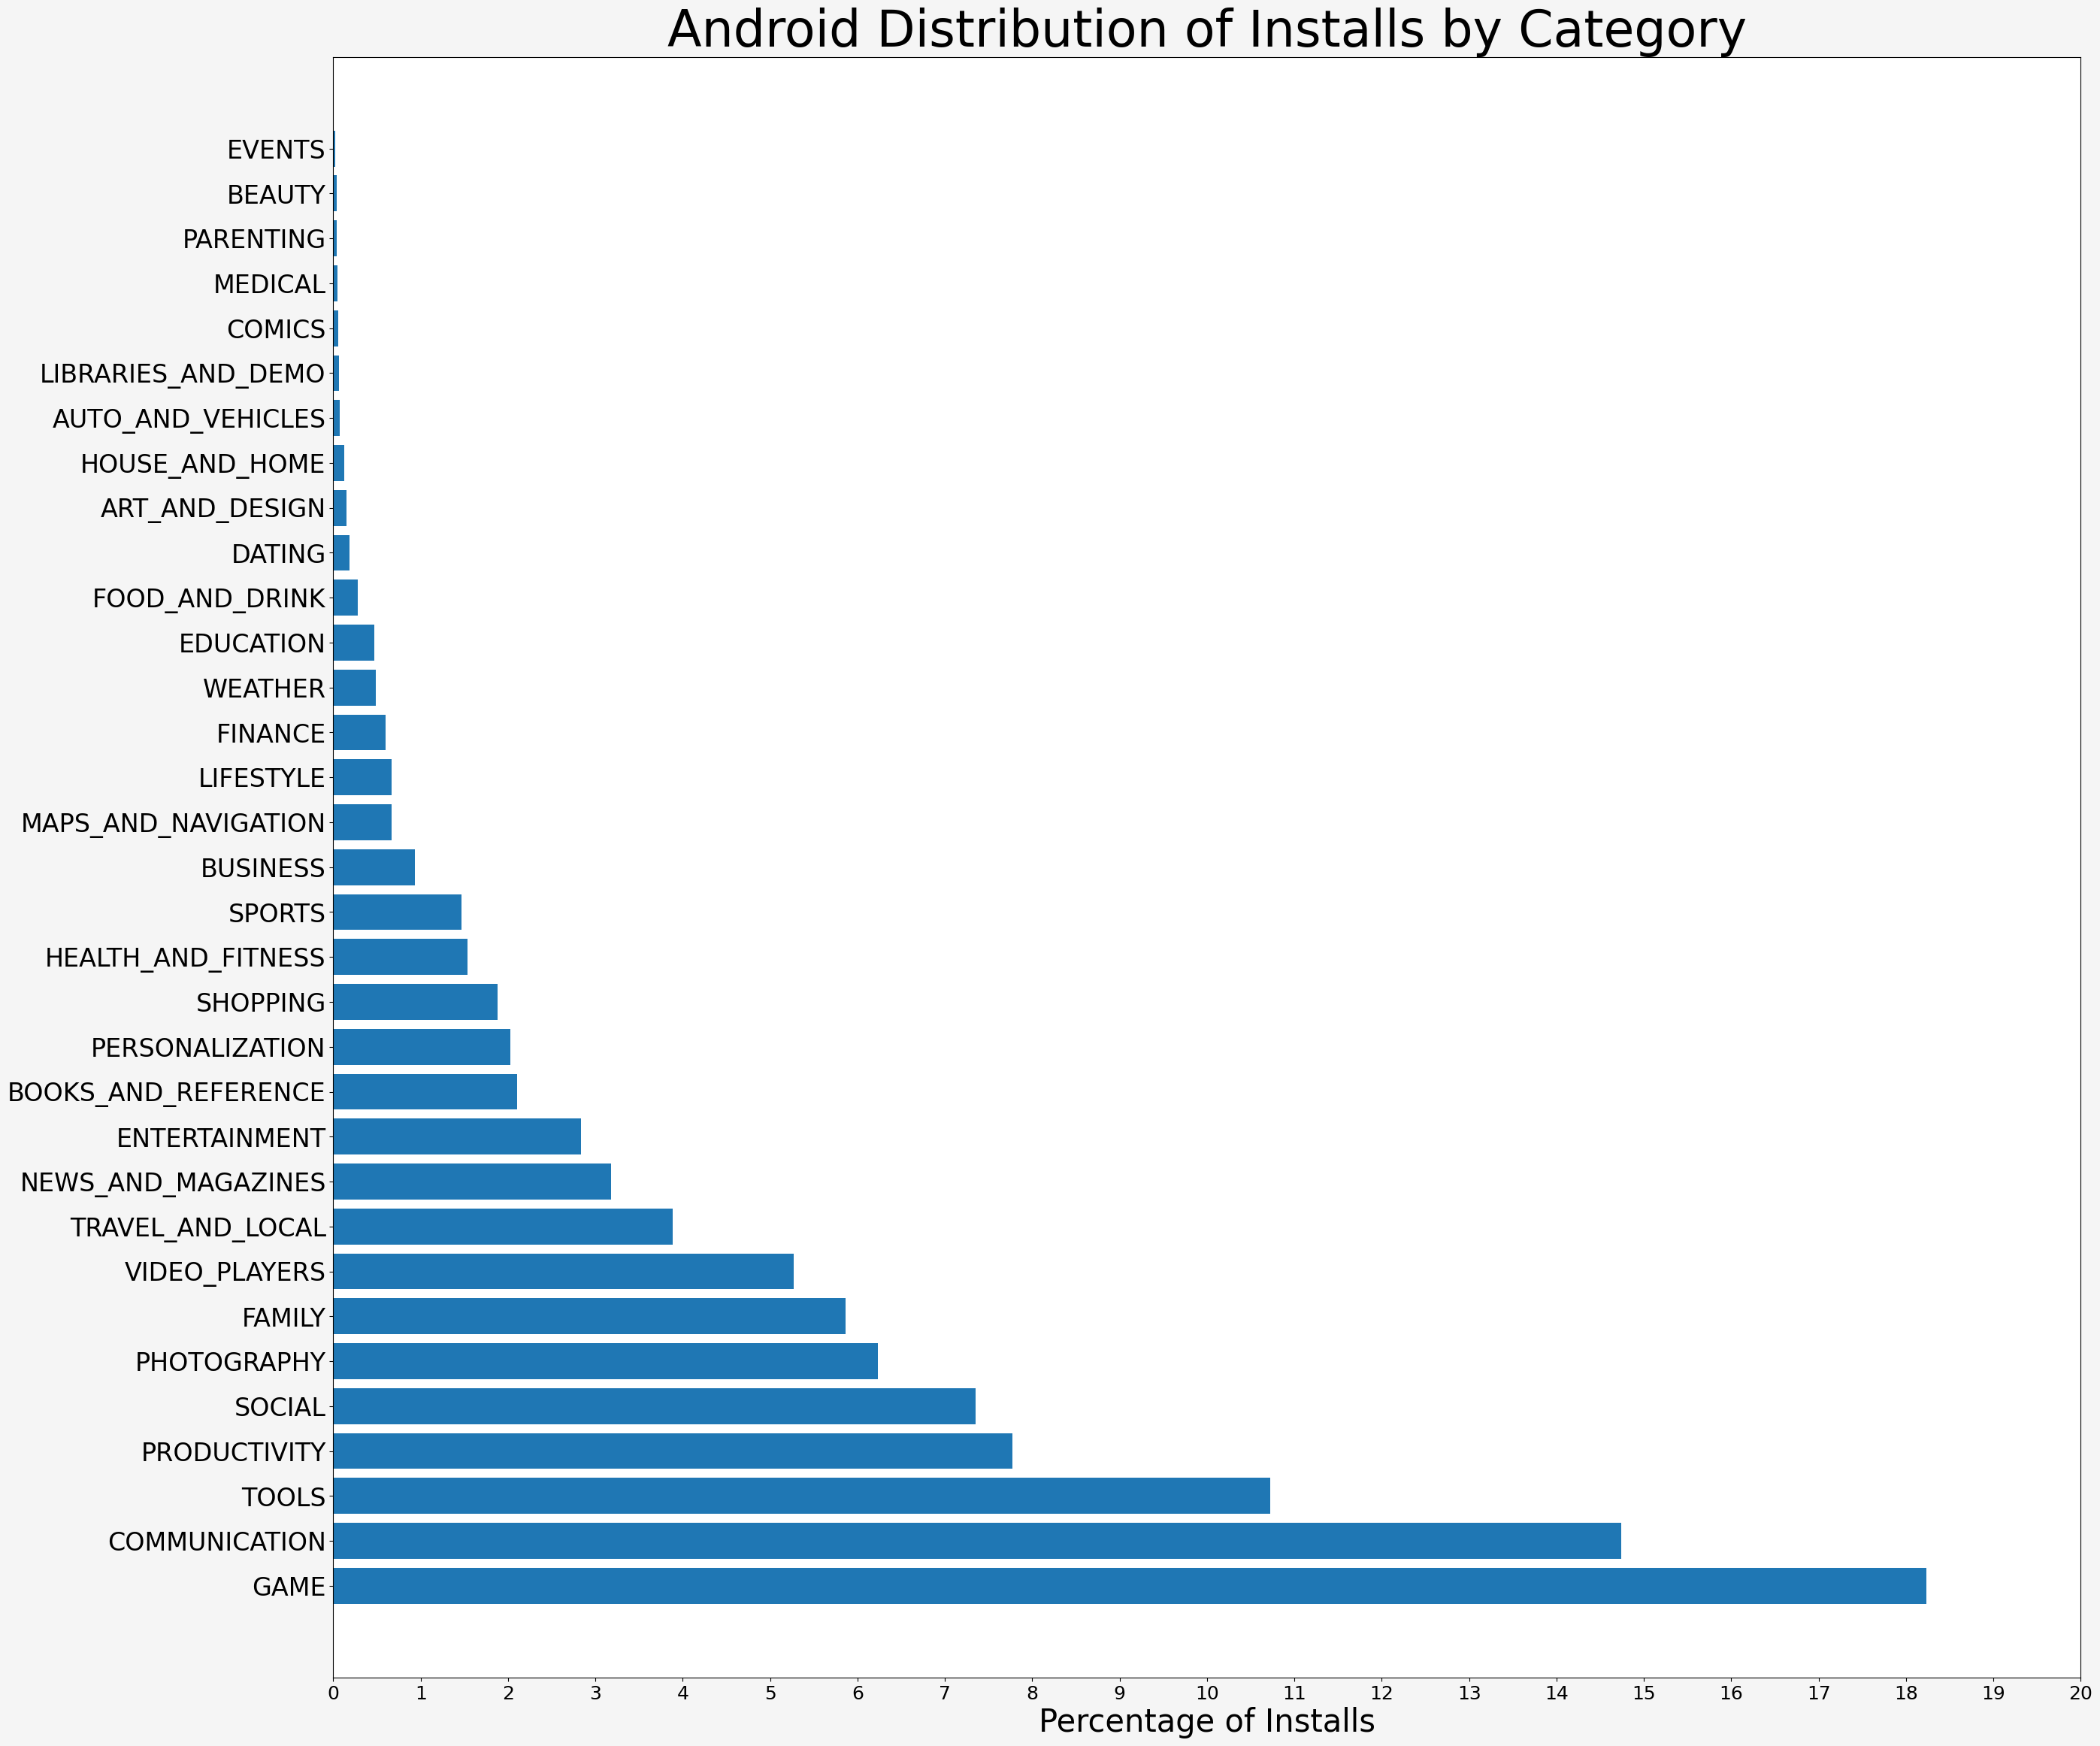

In [42]:
# Generate the frequency table
table = freq_table(android_free_df, 1)

# Create a horizontal bar chart
plt.figure(figsize=(30, 28), facecolor='#f5f5f5')
sorted_categories = sorted(table, key=table.get, reverse=True)
plt.barh(range(len(table)), [table[category] for category in sorted_categories])
plt.yticks(range(len(table)), sorted_categories, fontsize=24)
plt.xlabel('Percentage of Installs', fontsize=30)
plt.title('Android Distribution of Installs by Category', fontsize=48)
plt.xticks(range(0, 21, 1), fontsize=18)  # increase font size of x-axis tick labels and set x-ticks
plt.xlim(0, 20)  # set x-axis limits
plt.show()

### It looks like the categories Game, Communication, & Tools are the only 3 categories with 10% or more of the total installs throughout the Android dataset. Game's are taking the lead in the most apps by category & the most installs by category. However Social & Photography are are also doing very well. 

### We still need to find an app that would do well in both markets for app building company to create. 

### Let's take a look at the iOS dataset total ratings by genre. In this case we must use the rating counts because the iOS dataset does not give us a count of installs. A count of ratings is the closest we can get to figuring out how much traffic apps are getting in the dataset.

In [43]:
# iOS distribution of ratings by genre

# Calculate the total rating count for each genre in the iOS free apps dataset
ios_free_df.groupby('prime_genre')['rating_count_tot'].sum()
total_sum = ios_free_df['rating_count_tot'].sum()

# Calculate the percentage of rating count for each genre and sort by percentage in descending order
result = (ios_free_df.groupby('prime_genre')['rating_count_tot'].sum() / total_sum * 100).reset_index(name='percentage')
result = result.sort_values(by='percentage', ascending=False).reset_index(drop=True)
result.index += 1

# Define a function to display the result as an HTML table
def display_table(result):
    # Convert the result dataframe to a dictionary of records
    table = result.to_dict('records')
    # Create an HTML table string with headers for Rank, Category, and Percentage
    result = "<table><tr><th>Rank</th><th>iOS Genre</th><th>Percentage of Total Ratings</th></tr>"
    # Iterate over the records and add table rows with the rank, category, and percentage values
    for i, row in enumerate(table, start=1):
        result += f"<tr><td>{i}</td><td>{row['prime_genre']}</td><td>{row['percentage']:.10f}%</td></tr>"
    # Close the HTML table
    result += "</table>"
    return result

# Use IPython's display functionality to render the HTML table
from IPython.display import display, HTML
display(HTML(display_table(result)))

Rank,iOS Genre,Percentage of Total Ratings
1,Games,53.3930989386%
2,Social Networking,9.4962886085%
3,Photo & Video,5.6985926440%
4,Music,4.7377085966%
5,Entertainment,4.4611307238%
6,Shopping,2.7866488911%
7,Sports,1.9881053094%
8,Health & Fitness,1.8963860394%
9,Utilities,1.8939629165%
10,Weather,1.8330742846%


### Below is a visual representation the information above.

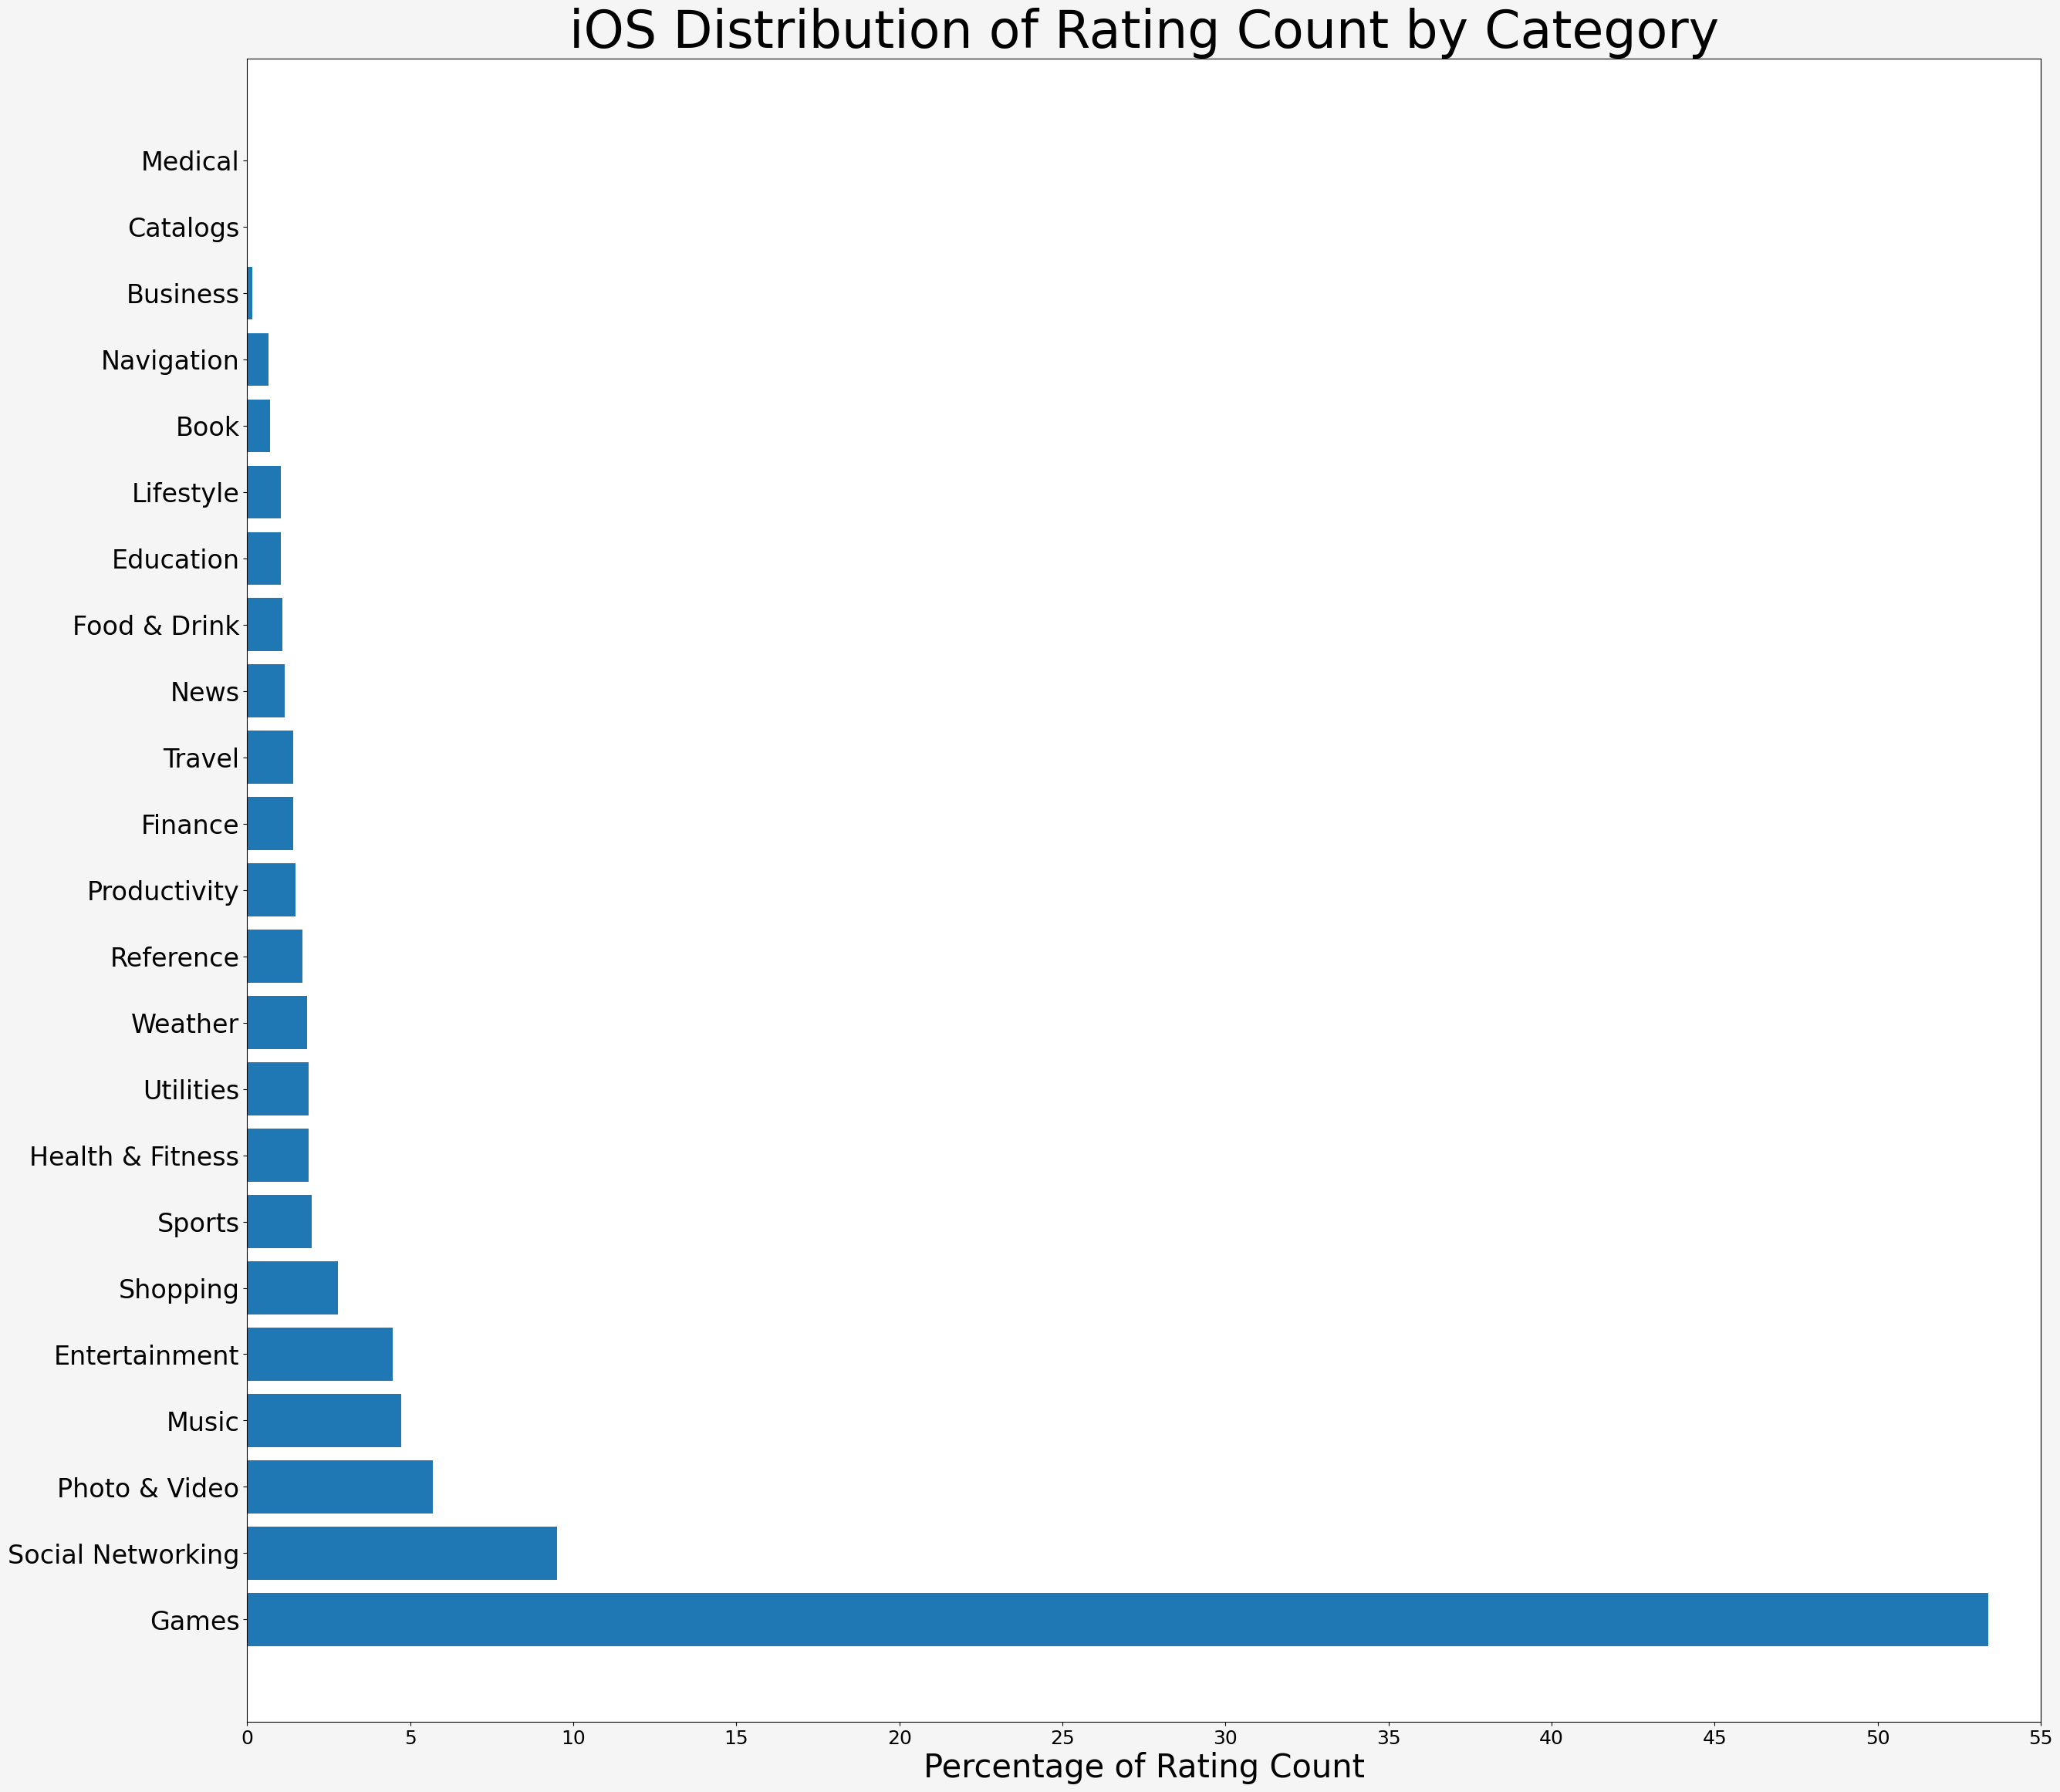

In [44]:
# Create a horizontal bar chart
plt.figure(figsize=(30, 28), facecolor='#f5f5f5')
plt.barh(range(len(result)), result['percentage'])
plt.yticks(range(len(result)), result['prime_genre'], fontsize=24)
plt.xlabel('Percentage of Rating Count', fontsize=30)
plt.title('iOS Distribution of Rating Count by Category', fontsize=48)
plt.xticks(range(0, 56, 5), fontsize=18)  # increase font size of x-axis tick labels and set x-ticks
plt.xlim(0, 55)  # set x-axis limits
plt.show()

### We can see the the iOS genre's Games, Social Networking, & Photo & Video as the top 3 with the highest rating counts. There appears to be a significant drop off in rating counts after these 3 genres.

### After comparing both the distribution & user traffic for both markets, we can see that Games takes the lead in both markets, Social media & Photo apps doing very well for having the lowest saturation between both markets.

### Games, Social, & Photo apps are going to be our target for analysis as they both fare very well in both markets.

### Let's take a look at the actual numbers for individual apps for these categories/genres to get a better insight into our datasets.

# Android category install numbers

In [45]:
# GAME category install numbers
# Filter the android_free_df dataframe to get the 'Installs' column for the 'GAME' category
game_installs = android_free_df[android_free_df['Category'] == 'GAME']['Installs']

# Get the top 10 largest 'Installs' values from the game_installs series
top_50_game_installs = game_installs.nlargest(50)

# Initialize a string to build an HTML table
result = "<table><tr><th>Rank</th><th>Android Category: Game</th><th>Installs</th></tr>"

# Loop through the top 10 game installs and build the table rows
for i, (index, installs) in enumerate(top_50_game_installs.items(), start=1):
    app_name = android_free_df.loc[index, 'App']
    formatted_game_installs = "{:,}+".format(installs)  # format the installs value with commas and a plus sign
    result += f"<tr><td>{i}</td><td>{app_name}</td><td>{formatted_game_installs}</td></tr>"

# Close the HTML table
result += "</table>"

# Import the necessary modules to display the HTML table
from IPython.display import display, HTML

# Display the HTML table
display(HTML(result))

Rank,Android Category: Game,Installs
1,Subway Surfers,"1,000,000,000+"
2,Candy Crush Saga,"500,000,000+"
3,Temple Run 2,"500,000,000+"
4,Pou,"500,000,000+"
5,My Talking Tom,"500,000,000+"
6,ROBLOX,"100,000,000+"
7,slither.io,"100,000,000+"
8,Clash Royale,"100,000,000+"
9,Helix Jump,"100,000,000+"
10,Angry Birds Rio,"100,000,000+"


### Android is highly saturated with games but they also have incredibly high installs.

In [46]:
# Filter the android_free_df dataframe to get the 'Installs' column for the 'SOCIAL' category
social_installs = android_free_df[android_free_df['Category'] == 'SOCIAL']['Installs']

# Get the top 10 installs for the social category
top_10_social_installs = social_installs.nlargest(10)

# Initialize a string to build an HTML table
result = "<table><tr><th>Rank</th><th>Android Category: Social</th><th>Installs</th></tr>"

# Loop through the top 10 installs and build the table rows
for i, (index, installs) in enumerate(top_10_social_installs.items(), start=1):
    app_name = android_free_df.loc[index, 'App']  # get the app name from the original dataframe
    formatted_social_installs = "{:,}+".format(installs)  # format the installs with commas and a "+" sign
    result += f"<tr><td>{i}</td><td>{app_name}</td><td>{formatted_social_installs}</td></tr>"

# Close the HTML table
result += "</table>"

# Display the HTML table using IPython's display function
from IPython.display import display, HTML
display(HTML(result))

Rank,Android Category: Social,Installs
1,Facebook,"1,000,000,000+"
2,Instagram,"1,000,000,000+"
3,Google+,"1,000,000,000+"
4,Facebook Lite,"500,000,000+"
5,Snapchat,"500,000,000+"
6,Tumblr,"100,000,000+"
7,Pinterest,"100,000,000+"
8,LinkedIn,"100,000,000+"
9,Badoo - Free Chat & Dating App,"100,000,000+"
10,Tango - Live Video Broadcast,"100,000,000+"


### The Social category is full of social media giants, it would be very risky & difficult competing against these apps.

In [47]:
# Photography category installs
# Filter the android_free_df dataframe to get the 'Installs' column for the 'PHOTOGRAPHY' category
photography_installs = android_free_df[android_free_df['Category'] == 'PHOTOGRAPHY']['Installs']

# Get the top 10 installs for the photography category
top_20_photography_installs = photography_installs.nlargest(20)

# Initialize a string to build an HTML table
result = "<table><tr><th>Rank</th><th>Android Category: Photography</th><th>Installs</th></tr>"

# Loop through the top 10 installs and build the table rows
for i, (index, installs) in enumerate(top_20_photography_installs.items(), start=1):
    app_name = android_free_df.loc[index, 'App']  # get the app name from the original dataframe
    formatted_photography_installs = "{:,}+".format(installs)  # format the installs with commas and a "+" sign
    result += f"<tr><td>{i}</td><td>{app_name}</td><td>{formatted_photography_installs}</td></tr>"

# Close the HTML table
result += "</table>"

# Display the HTML table using IPython's display function
from IPython.display import display, HTML
display(HTML(result))

Rank,Android Category: Photography,Installs
1,Google Photos,"1,000,000,000+"
2,B612 - Beauty & Filter Camera,"100,000,000+"
3,YouCam Makeup - Magic Selfie Makeovers,"100,000,000+"
4,BeautyPlus - Easy Photo Editor & Selfie Camera,"100,000,000+"
5,"Sweet Selfie - selfie camera, beauty cam, photo edit","100,000,000+"
6,YouCam Perfect - Selfie Photo Editor,"100,000,000+"
7,"Cymera Camera- Photo Editor, Filter,Collage,Layout","100,000,000+"
8,LINE Camera - Photo editor,"100,000,000+"
9,"Candy Camera - selfie, beauty camera, photo editor","100,000,000+"
10,Camera360: Selfie Photo Editor with Funny Sticker,"100,000,000+"


### The Photography category boasts low app saturation, higher than average installs, & the only Giant is Google Photos. Competing in this market would be profitable.

# iOS Genre Rating Counts

In [48]:
# iOS Games rating count
# Filter the ios_free_df dataframe to get the rows where the prime_genre is 'Games'
# and extract the 'rating_count_tot' column
games_rating_count_tot = ios_free_df[ios_free_df['prime_genre'] == 'Games']['rating_count_tot']

# Get the top 10 values in the games_rating_count_tot series
top_50_games_rating_count_tot = games_rating_count_tot.nlargest(50)

# Initialize a string to build an HTML table
result = "<table><tr><th>Rank</th><th>iOS Genre: Games</th><th>Rating_Count</th></tr>"

# Loop through the top 10 values and build the HTML table rows
for i, (index, rating_count) in enumerate(top_50_games_rating_count_tot.items(), start=1):
    app_name = ios_free_df.loc[index, 'track_name']
    formatted_rating_count = "{:,}".format(rating_count)
    result += f"<tr><td>{i}</td><td>{app_name}</td><td>{formatted_rating_count}</td></tr>"
result += "</table>"

# Use IPython's display functionality to render the HTML table
from IPython.display import display, HTML
display(HTML(result))

Rank,iOS Genre: Games,Rating_Count
1,Clash of Clans,"2,130,805"
2,Temple Run,"1,724,546"
3,Candy Crush Saga,"961,794"
4,Angry Birds,"824,451"
5,Subway Surfers,"706,110"
6,Solitaire,"679,055"
7,CSR Racing,"677,247"
8,Crossy Road - Endless Arcade Hopper,"669,079"
9,Injustice: Gods Among Us,"612,532"
10,Hay Day,"567,344"


### The iOS market for Games is highly saturated with apps, however many apps have high rating counts.

In [49]:
# iOS social networking rating count
# Filter the ios_free_df dataframe to get the rows where the prime_genre is 'Social Networking'
# and extract the 'rating_count_tot' column
social_networking_rating_count_tot = ios_free_df[ios_free_df['prime_genre'] == 'Social Networking']['rating_count_tot']

# Get the top 10 values in the social_networking_rating_count_tot series
top_20_social_networking_rating_count_tot = social_networking_rating_count_tot.nlargest(20)

# Initialize a string to build an HTML table
result = "<table><tr><th>Rank</th><th>iOS Genre: Social Networking</th><th>Rating_Count</th></tr>"

# Loop through the top 10 values and build the HTML table rows
for i, (index, rating_count) in enumerate(top_20_social_networking_rating_count_tot.items(), start=1):
    app_name = ios_free_df.loc[index, 'track_name']
    formatted_rating_count = "{:,}".format(rating_count)
    result += f"<tr><td>{i}</td><td>{app_name}</td><td>{formatted_rating_count}</td></tr>"
result += "</table>"

# Use IPython's display functionality to render the HTML table
from IPython.display import display, HTML
display(HTML(result))

Rank,iOS Genre: Social Networking,Rating_Count
1,Facebook,"2,974,676"
2,Pinterest,"1,061,624"
3,Skype for iPhone,"373,519"
4,Messenger,"351,466"
5,Tumblr,"334,293"
6,WhatsApp Messenger,"287,589"
7,Kik,"260,965"
8,"ooVoo â€“ Free Video Call, Text and Voice","177,501"
9,TextNow - Unlimited Text + Calls,"164,963"
10,Viber Messenger â€“ Text & Call,"164,249"


### The Social Networking Genre for iOS is full of social media giants that would make competing very risky & difficult.

In [50]:
# iOS Photo & Video rating count
# Filter the ios_free_df dataframe to get the rows where the prime_genre is 'Photo & Video'
# and extract the 'rating_count_tot' column
photo_video_rating_count_tot = ios_free_df[ios_free_df['prime_genre'] == 'Photo & Video']['rating_count_tot']

# Get the top 10 values in the photo_video_rating_count_tot series
top_10_photo_video_rating_count_tot = photo_video_rating_count_tot.nlargest(10)

# Initialize a string to build an HTML table
result = "<table><tr><th>Rank</th><th>iOS Genre: Photo & Video</th><th>Rating_Count</th></tr>"

# Loop through the top 10 values and build the HTML table rows
for i, (index, rating_count) in enumerate(top_10_photo_video_rating_count_tot.items(), start=1):
    app_name = ios_free_df.loc[index, 'track_name']
    formatted_rating_count = "{:,}".format(rating_count)
    result += f"<tr><td>{i}</td><td>{app_name}</td><td>{formatted_rating_count}</td></tr>"
result += "</table>"

# Use IPython's display functionality to render the HTML table
from IPython.display import display, HTML
display(HTML(result))

Rank,iOS Genre: Photo & Video,Rating_Count
1,Instagram,"2,161,558"
2,Snapchat,"323,905"
3,"YouTube - Watch Videos, Music, and Live Streams","278,166"
4,Pic Collage - Picture Editor & Photo Collage Maker,"123,433"
5,Funimate video editor: add cool effects to videos,"123,268"
6,musical.ly - your video social network,"105,429"
7,Photo Collage Maker & Photo Editor - Live Collage,"93,781"
8,Vine Camera,"90,355"
9,Google Photos - unlimited photo and video storage,"88,742"
10,Flipagram,"79,905"


### The iOS Genre: Photo & Video boasts low saturation & higher than average rating counts. There are a few giants to compete with, however these giants are closer to social media than photo & video editing/storage etc. Competing in this market would be profitable.

# Risk Assesment

## Games: Medium Risk
## Social: High Risk
## Photo & Video: Low Risk

# Summary

## After analyzing both datasets for iOS & Android markets, Photo & Video would be the best app category to build in. There is low competition & relatively high user traffic. Additionally, users would spend considerable time in these apps managing their photo's & videos making this the safest option.
## Although Games are highly saturated in both markets, they both boast incredibly high user traffic. Competing in this market may take more work but it could have greater results for ad revenue. This poses some risk, the app could fail & not be popular with users & with many more games available to users, it certainly adds a higher level of competition into build this type of app.
## Finally we have Social Media, although there is low saturation in apps available, competing against social media giants involves incredibly high risk. Building an app for this category would not be profitable.

# References:

### https://dq-content.s3.amazonaws.com/350/AppleStore.csv

### https://dq-content.s3.amazonaws.com/350/googleplaystore.csv

### https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb